In [24]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
print(boston.data.shape)
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [30]:
load_boston().target.shape
from sklearn.model_selection import train_test_split

XX = df.values
y = boston.target
# XX,mu,sigma = utils.feature_normalize(XX)

X_train,X_vt,y_train,y_vt = train_test_split(XX,y, test_size=0.2)
X_test,X_val,y_test,y_val = train_test_split(X_vt, y_vt, test_size=0.5)
print(X_train.shape)
print(y_train.shape)
XX

(404, 13)
(404,)


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

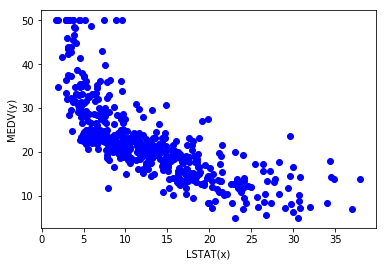

In [19]:
X = df.LSTAT
plot_utils.plot_data(X,y,'LSTAT(x)','MEDV(y)')


In [26]:
X_train, mu, sigma = utils.feature_normalize(X_train)
X_train = np.vstack([np.ones((X_train.shape[0],)),X_train.T]).T
X_test = (X_test - mu)/sigma
X_test = np.vstack([np.ones((X_test.shape[0],)),X_test.T]).T
X_val = (X_val - mu)/sigma
X_val = np.vstack([np.ones((X_val.shape[0],)),X_val.T]).T
print('the shape of X_train is ',X_train.shape)
print('the shape of X_test is ',X_test.shape)
print('the shape of X_val is ',X_val.shape)
print('the shape of y_train is ',y_train.shape)
print('the shape of y_test is ',y_test.shape)
print('the shape of y_val is ',y_val.shape)




the shape of X_train is  (404, 14)
the shape of X_test is  (51, 14)
the shape of X_val is  (51, 14)
the shape of y_train is  (404,)
the shape of y_test is  (51,)
the shape of y_val is  (51,)


Optimization terminated successfully.
         Current function value: 10.554436
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
[22.24801976 -1.05191228  1.18557478  0.54565083  0.52764171 -2.6873868
  2.24131747  0.25158209 -3.26405883  3.28493995 -2.59234955 -2.10481204
  0.58328336 -4.1665147 ]
[22.2480198  -1.0519024   1.18556915  0.54565746  0.52764367 -2.68738995
  2.24132882  0.25157225 -3.26406115  3.28493382 -2.59236215 -2.10480577
  0.58327787 -4.16650499]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 11
        

Optimization terminated successfully.
         Current function value: 7.456655
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 7.356108
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 7.259211
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 7.221746
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 7.629422
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 7.542356
         Iterations: 27
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 7.150207
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.101951
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 7.077780
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 7.034120
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 6.984172
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 6.934874
         Iterations: 27
         Function evaluations: 28
  

Optimization terminated successfully.
         Current function value: 8.192946
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.164259
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.125919
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.104401
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.066889
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.097279
         Iterations: 27
         Function evaluations: 28
  

Optimization terminated successfully.
         Current function value: 8.749410
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.741056
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.707908
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.674797
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.650308
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 8.643807
         Iterations: 24
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 10.340794
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.358319
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.333127
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.299692
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.297624
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.264851
         Iterations: 24
         Function evaluations:

Optimization terminated successfully.
         Current function value: 10.351113
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.322157
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.294368
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.284736
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.292347
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.275772
         Iterations: 24
         Function evaluations:

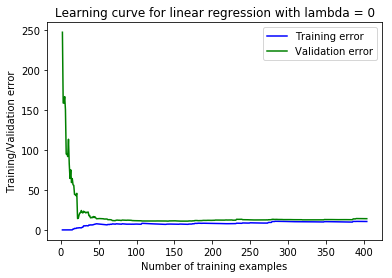

In [11]:
reg = 0
# print(X_val)
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_opt_lamda0 = reglinear_reg.train(X_train,y_train,reg,num_iters=1000)
print(theta_opt_lamda0)
theta_opt_true = reglinear_reg.normal_equation(X_train, y_train, reg)
print(theta_opt_true)
error_train, error_val = utils.learning_curve(X_train,y_train,X_val,y_val,reg)
plot_utils.plot_learning_curve(error_train, error_val,reg)

plt.show()

Optimization terminated successfully.
         Current function value: 10.634439
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
[22.24801906 -1.03884166  1.16594072  0.50024333  0.53031427 -2.63673772
  2.25586593  0.23934861 -3.22763048  3.17249392 -2.48701238 -2.08948314
  0.58564257 -4.14475312]
[22.2480198  -1.0519024   1.18556915  0.54565746  0.52764367 -2.68738995
  2.24132882  0.25157225 -3.26406115  3.28493382 -2.59236215 -2.10480577
  0.58327787 -4.16650499]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 3.392289
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 2.262141
         Iterations: 15
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 7.279858
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.173379
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.550021
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.518680
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.486787
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.984230
         Iterations: 23
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 7.543550
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.489469
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.431956
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.383013
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.340668
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 7.336753
         Iterations: 25
         Function evaluations: 26
  

Optimization terminated successfully.
         Current function value: 8.450681
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 8.409055
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.408484
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.399694
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.361258
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.328976
         Iterations: 27
         Function evaluations: 28
  

Optimization terminated successfully.
         Current function value: 8.389173
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.377989
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.845709
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.810645
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.775186
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.742189
         Iterations: 25
         Function evaluations: 26
  

Optimization terminated successfully.
         Current function value: 10.557050
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.526466
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 10.497684
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 10.505425
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 10.475470
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.441247
         Iterations: 24
         Function evaluations:

Optimization terminated successfully.
         Current function value: 10.486735
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.457112
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.458190
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.435925
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.430665
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.428723
         Iterations: 24
         Function evaluations:

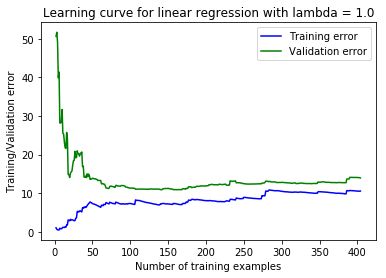

In [13]:
reg = 1.0
# print(X_val)
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_opt_lamda0 = reglinear_reg.train(X_train,y_train,reg,num_iters=1000)
print(theta_opt_lamda0)
theta_opt_true = reglinear_reg.normal_equation(X_train, y_train, reg)
print(theta_opt_true)
error_train, error_val = utils.learning_curve(X_train,y_train,X_val,y_val,reg)
plot_utils.plot_learning_curve(error_train, error_val,reg)

plt.show()

Optimization terminated successfully.
         Current function value: 10.554436
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
[22.24801976 -1.05191228  1.18557478  0.54565083  0.52764171 -2.6873868
  2.24131747  0.25158209 -3.26405883  3.28493995 -2.59234955 -2.10481204
  0.58328336 -4.1665147 ]
[22.2480198  -1.0519024   1.18556915  0.54565746  0.52764367 -2.68738995
  2.24132882  0.25157225 -3.26406115  3.28493382 -2.59236215 -2.10480577
  0.58327787 -4.16650499]
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Grad

C:\Users\alexumbrala\Downloads\comp540\SML\hw1\part2\reg_linear_regressor_multi.py:155: RuntimeWarning: invalid value encountered in true_divide
  grad = np.dot(error.T, X).T / X.shape[0]
C:\Users\alexumbrala\Downloads\comp540\SML\hw1\part2\reg_linear_regressor_multi.py:156: RuntimeWarning: invalid value encountered in true_divide
  grad[1:]+=reg*theta[1:]/X.shape[0]
C:\Users\alexumbrala\Downloads\comp540\SML\hw1\part2\reg_linear_regressor_multi.py:137: RuntimeWarning: invalid value encountered in double_scalars
  J = 0.5*((error**2).sum()+reg*(theta[1:]**2).sum())/X.shape[0]
C:\Users\alexumbrala\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         G

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 15
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 27
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 27
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 28
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 35
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 39
         Function evaluations: 42
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.789443
         Iterations: 37
         Function evaluations: 38
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.681098
         Iterations: 47
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 54
         Function evaluations: 55
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 0.218122
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 55
         Function evaluations: 59
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 63
         Function evaluations: 65
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 53
         Function evaluations: 56
         Gradient evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 42
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 41
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 64
         Function evaluations: 66
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 3.531802
         Iterations: 48
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 1.852898
         Iterations: 51
         Function evaluations: 53
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 54
         Function evaluations: 56
         Gradient evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 52
         Function evaluations: 53
  

Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 43
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 2.458995
         Iterations: 44
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.464852
         Iterations: 48
         Function evaluations: 49
         Gradient evaluations: 49
Optimization terminated successfully.
         Current function value: 0.245864
         Iterations: 43
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.040930
         Iterations: 45
         Function evaluations: 48
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 3.900399
         Iterations: 37
         Function evaluations: 38
  

Optimization terminated successfully.
         Current function value: 4.582667
         Iterations: 52
         Function evaluations: 54
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 1.995135
         Iterations: 45
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 1.410536
         Iterations: 51
         Function evaluations: 52
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 0.143361
         Iterations: 47
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 0.284573
         Iterations: 50
         Function evaluations: 52
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 3.968617
         Iterations: 40
         Function evaluations: 42
  

Optimization terminated successfully.
         Current function value: 0.452171
         Iterations: 44
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 1.994513
         Iterations: 40
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 4.874581
         Iterations: 42
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.446746
         Iterations: 43
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.689669
         Iterations: 53
         Function evaluations: 55
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 0.762169
         Iterations: 36
         Function evaluations: 37
  

Optimization terminated successfully.
         Current function value: 1.140217
         Iterations: 43
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 2.116791
         Iterations: 42
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 1.149453
         Iterations: 36
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 3.017822
         Iterations: 39
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 2.251469
         Iterations: 36
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 1.430480
         Iterations: 40
         Function evaluations: 43
  

Optimization terminated successfully.
         Current function value: 5.087842
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 1.983494
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.494378
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 5.084139
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.674845
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.584391
         Iterations: 40
         Function evaluations: 43
  

Optimization terminated successfully.
         Current function value: 4.609394
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.971083
         Iterations: 44
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 4.181436
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 3.693376
         Iterations: 36
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 1.042727
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 3.588239
         Iterations: 37
         Function evaluations: 39
  

Optimization terminated successfully.
         Current function value: 2.487916
         Iterations: 52
         Function evaluations: 55
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 3.316847
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 4.090711
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 2.569353
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 5.349120
         Iterations: 39
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 1.207307
         Iterations: 33
         Function evaluations: 35
  

Optimization terminated successfully.
         Current function value: 0.934808
         Iterations: 36
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 1.871230
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 4.993356
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 1.774400
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 2.695715
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 3.174445
         Iterations: 31
         Function evaluations: 34
  

Optimization terminated successfully.
         Current function value: 3.001807
         Iterations: 43
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 7.043637
         Iterations: 36
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 2.678164
         Iterations: 40
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 5.029322
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 3.479881
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.639916
         Iterations: 36
         Function evaluations: 38
  

Optimization terminated successfully.
         Current function value: 1.195937
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.647523
         Iterations: 40
         Function evaluations: 41
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 3.159665
         Iterations: 37
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 5.932756
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 4.486778
         Iterations: 40
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 1.279059
         Iterations: 33
         Function evaluations: 35
  

Optimization terminated successfully.
         Current function value: 5.953645
         Iterations: 33
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 4.998111
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 6.082264
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 2.294995
         Iterations: 42
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 2.816454
         Iterations: 38
         Function evaluations: 41
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 4.334967
         Iterations: 41
         Function evaluations: 44
  

Optimization terminated successfully.
         Current function value: 3.706561
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.794018
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.037547
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 2.703256
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 6.258637
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 5.784034
         Iterations: 34
         Function evaluations: 37
  

Optimization terminated successfully.
         Current function value: 2.754689
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 5.097132
         Iterations: 44
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 3.188348
         Iterations: 36
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 2.773661
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 5.172613
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 5.695265
         Iterations: 33
         Function evaluations: 36
  

Optimization terminated successfully.
         Current function value: 4.270949
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.670144
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 5.459605
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 4.228831
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 3.351690
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 2.963942
         Iterations: 32
         Function evaluations: 34
  

         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 4.969444
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 2.225146
         Iterations: 39
         Function evaluations: 41
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 3.531469
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 3.288023
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 2.005131
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 5.911055
         Iterations: 29
  

Optimization terminated successfully.
         Current function value: 6.317643
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 4.307197
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.013477
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 1.343201
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 6.518917
         Iterations: 32
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 1.290752
         Iterations: 43
         Function evaluations: 46
  

Optimization terminated successfully.
         Current function value: 1.999222
         Iterations: 36
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 3.173055
         Iterations: 39
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 4.274932
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 4.104870
         Iterations: 36
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 3.958087
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.653783
         Iterations: 29
         Function evaluations: 31
  

Optimization terminated successfully.
         Current function value: 6.373430
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 4.279803
         Iterations: 33
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 6.838792
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 4.806040
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 4.704192
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 2.770624
         Iterations: 30
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 5.050626
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 4.041234
         Iterations: 37
         Function evaluations: 40
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 4.624930
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 7.158627
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 5.590404
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 4.189745
         Iterations: 30
         Function evaluations: 33
  

Optimization terminated successfully.
         Current function value: 5.304877
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 4.331766
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 6.214807
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.289213
         Iterations: 36
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 4.798261
         Iterations: 36
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 4.339665
         Iterations: 31
         Function evaluations: 33
  

Optimization terminated successfully.
         Current function value: 3.232325
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 3.760389
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 5.143851
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 3.130272
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 6.295868
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 6.136925
         Iterations: 37
         Function evaluations: 40
  

Optimization terminated successfully.
         Current function value: 4.971756
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 4.657809
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.331290
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 5.390447
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 5.053539
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 5.941378
         Iterations: 28
         Function evaluations: 30
  

         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 4.999578
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 4.658680
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 4.725575
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 5.393124
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 5.531455
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         C

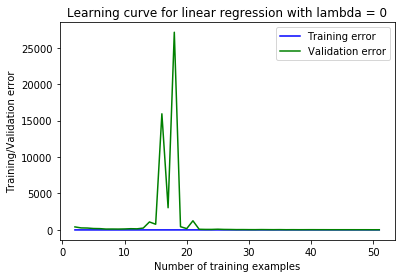

In [16]:
reg = 0
# print(X_val)
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_opt_lamda0 = reglinear_reg.train(X_train,y_train,reg,num_iters=1000)
print(theta_opt_lamda0)
theta_opt_true = reglinear_reg.normal_equation(X_train, y_train, reg)
print(theta_opt_true)
error_train, error_val = utils.averaged_learning_curve(X_train,y_train,X_val,y_val,reg)
plot_utils.plot_learning_curve(error_train, error_val,reg)

plt.show()

Optimization terminated successfully.
         Current function value: 10.554436
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.554444
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.554460
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.554517
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.554680
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.555249
         Iterations: 25
         Function evaluations:

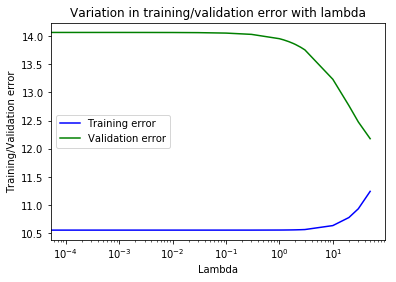

In [14]:
reg_vec, error_train, error_val = utils.validation_curve(X_train,y_train,X_val,y_val)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()


In [32]:
from utils import feature_normalize
import sklearn
from sklearn.preprocessing import PolynomialFeatures

num_feature = 13
# Map X onto polynomial features and normalize
# We will consider a 6th order polynomial fit for the data
X_train2,X_vt2,y_train2,y_vt2 = train_test_split(XX,y, test_size=0.2)
X_test2,X_val2,y_test2,y_val2 = train_test_split(X_vt2, y_vt2, test_size=0.5)
p = 2
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly_train = poly.fit_transform(np.reshape(X_train2,(len(X_train2),num_feature)))
X_poly_train, mu, sigma = utils.feature_normalize(X_poly_train)

# add a column of ones to X_poly

X_poly_train = np.vstack([np.ones((X_poly_train.shape[0],)),X_poly_train.T]).T

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(np.reshape(X_test2,(len(X_test2),num_feature)))
X_poly_val = poly.fit_transform(np.reshape(X_val2,(len(X_val2),num_feature)))

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
X_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
X_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T


print('the shape of XX_poly_train is ',X_poly_train.shape)
print('the shape of XX_poly_val is ',X_poly_val.shape)
print('the shape of XX_poly_test is ',X_poly_test.shape)

the shape of XX_poly_train is  (404, 105)
the shape of XX_poly_val is  (51, 105)
the shape of XX_poly_test is  (51, 105)


Optimization terminated successfully.
         Current function value: 30.986140
         Iterations: 925
         Function evaluations: 929
         Gradient evaluations: 929
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
        

         Current function value: 0.701926
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 0.768488
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 0.843226
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 1.178779
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 1.239583
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 1.335850
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 1.471871
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 1.326355

         Current function value: 9.909394
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 10.479748
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 10.356989
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 10.272988
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 10.966588
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 11.329350
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 11.418367
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 11

         Current function value: 21.237251
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 21.129379
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 21.096775
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 21.014155
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 21.329742
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 21.162525
         Iterations: 100
         Function evaluations: 106
         Gradient evaluations: 106
         Current function value: 21.207592
         Iterations: 100
         Function evaluations: 106
         Gradient evaluations: 106
         Current function value: 2

         Current function value: 23.174794
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 23.058391
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 22.916954
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 22.823012
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 22.771885
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 23.036747
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 22.873483
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 2

         Current function value: 26.020602
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 25.984012
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 25.854992
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 25.824046
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 26.009267
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 26.322154
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 26.211294
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 2

         Current function value: 28.867807
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 28.870031
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 28.879223
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 29.102002
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 29.042588
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 29.007130
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 28.917242
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 2

         Current function value: 29.469187
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 29.639360
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 29.583746
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 29.962117
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 29.992298
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 29.902269
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 30.081584
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3

         Current function value: 30.605983
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 31.479775
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 31.391872
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 31.331733
         Iterations: 100
         Function evaluations: 106
         Gradient evaluations: 106
         Current function value: 31.623470
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 31.564426
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 31.459762
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 3

         Current function value: 32.798825
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102
         Current function value: 32.658362
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 32.575348
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 32.730914
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104


NameError: name 'plot' is not defined

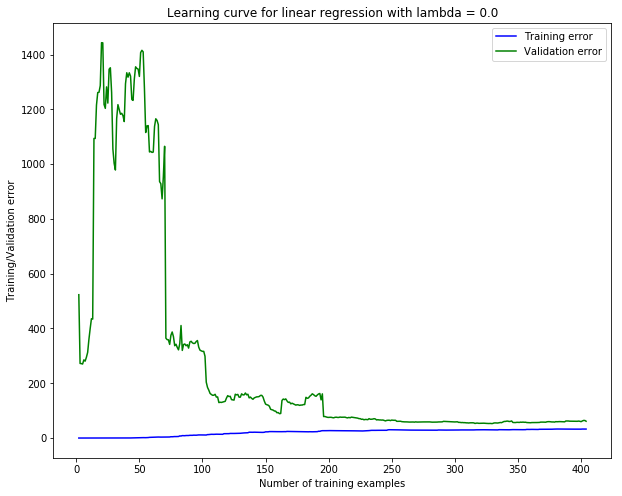

In [33]:
reg = 0.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg2.train(X_poly_train,y_train,reg,num_iters=1000)
error_train, error_val = utils.learning_curve(X_poly_train,y_train,X_poly_val,y_val,reg)
plot_utils.plot_learning_curve(error_train, error_val,reg)
plot.show()